1. **Load the Dataset**: It starts by loading two CSV files that presumably contain the details of Samsung smartphones. These datasets are stored in `data` and `new_data` pandas DataFrames.

2. **Data Cleaning**: The script then performs a series of operations to clean and preprocess the 'new_data' dataset, including removing currency symbols, splitting complex fields into multiple fields, and filling missing values.

3. **Combining Datasets**: The cleaned 'new_data' and the original 'data' datasets are then combined into a single DataFrame, `combined_data`.

4. **Data Analysis**: It computes the average rating and price for each smartphone model and then visualizes the distribution of smartphone prices and the relationship between price and ratings using histograms and scatter plots.

5. **Data Preprocessing for Model**: It prepares the data for use in a recommendation system model. This includes filling missing values, standardizing the features, and computing the cosine similarity between the products.

6. **Recommendation System**: It defines a function `recommend_products()` that recommends similar products to a given product based on their feature similarity. A user interface is also set up to interactively select a product and display its recommendations.

7. **Customer Segmentation**: It performs K-means clustering to segment the smartphones into different groups (clusters), visualizes the clusters using PCA for dimensionality reduction, and describes the characteristics of each cluster.

8. **Price Prediction**: It applies several regression models (Linear Regression, Decision Tree, Random Forest, Support Vector Regression, and Gradient Boosting) to predict the price of a smartphone based on its features. It computes and outputs the Mean Absolute Error (MAE) for each model.

9. **Feature Importance**: It applies a Gradient Boosting Regressor to the most important features identified, to predict the smartphone price.

![Flow Diagram](https://kroki.io/mermaid/svg/eNpNjk0KwjAQhfeeIhfoFQStCIJCse5CF2M61kCTKcl00dvb_LVukvfmfW-YwcH0Fa_zQYg7QS_DIy7A4JE7UVVHUY8IVoZRktoO3UpHnQAyb21Rpn-NS99HLqWRPFkYF6992lZcoIqOWONwcqTQZ3D3YfmHnHhQj2Po7VFsPlGRMWh7uSlgTVa0i2c0obEFsdDisGqW9eyZDLoyiK2AZ1_u6rVi2TitsLjMZRe5m5nIMViF8orAs8O_UfcDwBh_pw==)

# Import the Dataset

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/samsungMobilesData.csv')

# Display the first 5 rows of the dataframe
data.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


# Loading Data

In [ ]:
# Load the new dataset
new_data = pd.read_csv('/content/samsung_mobile_new_data.csv')

# Display the first 5 rows of the new dataframe
new_data.head()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹9,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,"₹15,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh


# Data cleaning for the new dataset

In [ ]:
# Data cleaning for the new dataset

# Remove the currency symbol from the price and convert it to an integer
new_data['price'] = new_data['price'].str.replace('₹', '').str.replace(',', '').astype(int)

# Split the 'storage_ram' field into 'internal_storage', 'ram', and 'expandable_storage'
new_data['internal_storage'] = new_data['storage_ram'].str.extract('Internal Storage(\d+) GB', expand=False).astype(float)
new_data['ram'] = new_data['storage_ram'].str.extract('RAM(\d+) GB', expand=False).astype(float)
new_data['expandable_storage'] = new_data['storage_ram'].str.extract('Expandable Storage(\d+) GB', expand=False).astype(float)

# Split the 'os_processor' field into 'os' and 'processor_type'
new_data['os'] = new_data['os_processor'].str.extract('Operating System(.+?)Processor', expand=False).str.strip()
new_data['processor_type'] = new_data['os_processor'].str.extract('Processor Type(.+)', expand=False).str.strip()

# Split the 'camera' field into 'primary_camera', 'secondary_camera', and 'flash_type'
new_data['primary_camera'] = new_data['camera'].str.extract('Primary Camera(\d+)MP', expand=False).astype(float)
new_data['secondary_camera'] = new_data['camera'].str.extract('Secondary Camera(\d+)MP', expand=False).astype(float)
new_data['flash_type'] = new_data['camera'].str.extract('Flash(.+?)', expand=False).str.strip()

# Split the 'display' field into 'display_size', 'resolution', 'display_type', and 'other_display_features'
new_data['display_size'] = new_data['display'].str.extract('Display Size(.+?) cm', expand=False).str.replace('(', '').astype(float)
new_data['resolution'] = new_data['display'].str.extract('Resolution(.+?)Pixels', expand=False).str.strip()
new_data['display_type'] = new_data['display'].str.extract('Display Type(.+?)', expand=False).str.strip()

# Split the 'network' field into 'network_type' and 'supported_networks'
new_data['network_type'] = new_data['network'].str.extract('Network Type(.+?)Supported', expand=False).str.strip()
new_data['supported_networks'] = new_data['network'].str.extract('Supported Networks(.+)', expand=False).str.strip()

# Fill missing values in 'battery_capacity' with -1 before converting to integer
new_data['battery_capacity'] = new_data['battery'].str.extract('Battery Capacity(\d+) mAh', expand=False).fillna(-1).astype(int)

new_data.head()

# Drop the original columns
new_data.drop(['storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery'], axis=1, inplace=True)

new_data.head()

,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,NaN,Android 12,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,Y,16.76,2408 x 1080,F,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


# Average rating and price for each smartphone model

In [ ]:
# Concatenate the original dataset and the new dataset
combined_data = pd.concat([data, new_data], ignore_index=True)

# Average rating and price for each smartphone model
average_rating_price = combined_data.groupby('name')[['ratings', 'price']].mean()

average_rating_price.head()

,ratings,price
name,,
"OPPO Reno10 5G (Ice Blue, 256 GB)",4.2500,32999.0
"OPPO Reno10 5G (Silvery Grey, 256 GB)",4.2125,32999.0
SAMSUNG 1215,NaN,2099.0
"SAMSUNG A04 E (Copper, 128 GB)",4.1000,11499.0
"SAMSUNG A04 e (Copper, 64 GB)",4.1000,9999.0


# Distribution of Smartphone Prices

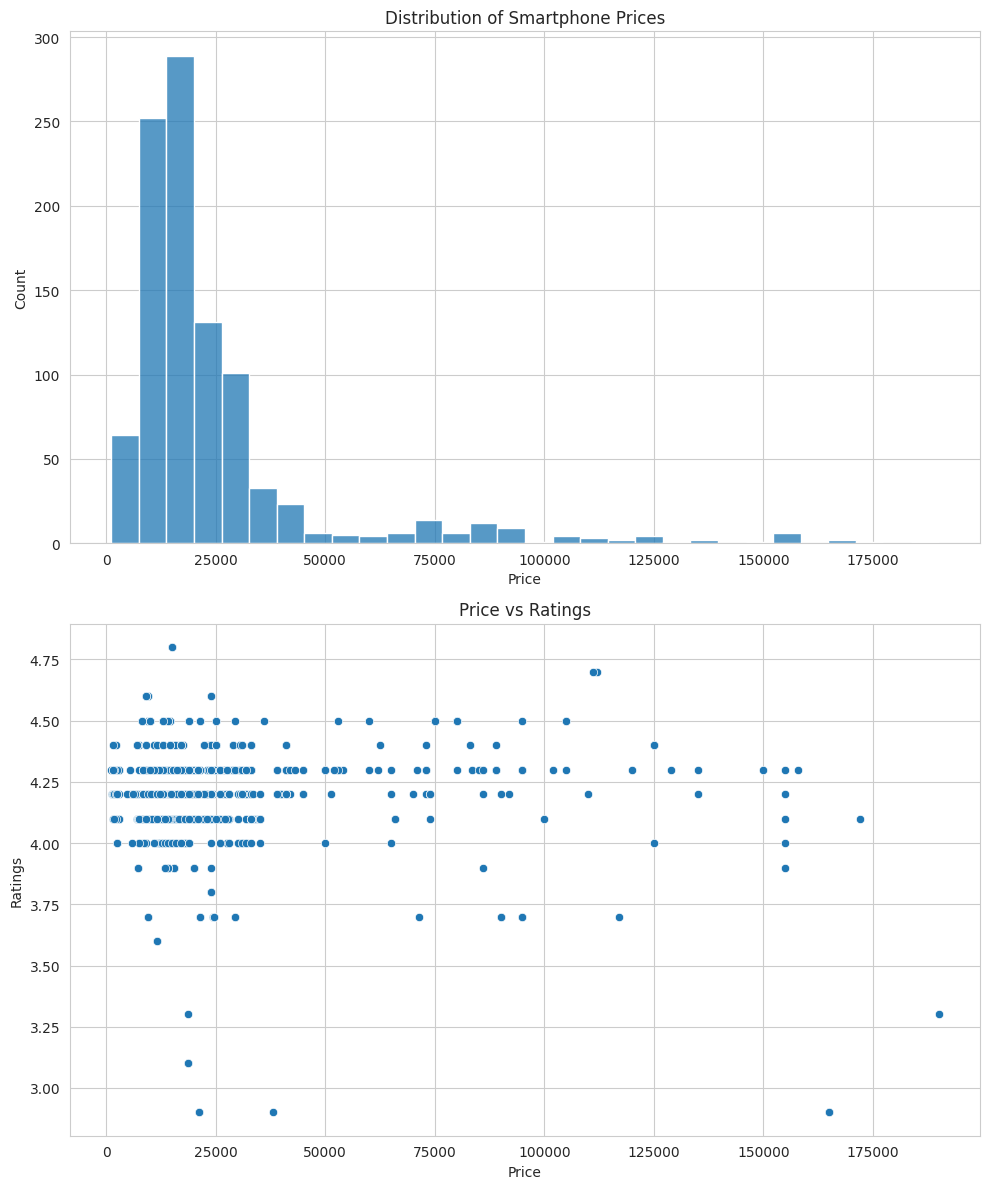

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of prices
sns.histplot(combined_data['price'], bins=30, ax=ax1)
ax1.set_title('Distribution of Smartphone Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Scatter plot of prices and ratings
sns.scatterplot(data=combined_data, x='price', y='ratings', ax=ax2)
ax2.set_title('Price vs Ratings')
ax2.set_xlabel('Price')
ax2.set_ylabel('Ratings')

# Display the plots
plt.tight_layout()
plt.show()

1. **Distribution of Smartphone Prices**: The histogram shows that most of the smartphone prices are in the lower range, with a few models having a higher price. This suggests that Samsung offers a wide range of smartphones catering to various price segments, with a focus on more affordable options.

2. **Price vs Ratings**: The scatter plot shows the relationship between price and ratings. It does not show a clear correlation between the two, suggesting that higher-priced models do not necessarily receive higher ratings. This could be because ratings are influenced by various factors beyond price, such as features, performance, and user expectations.

# Recommedation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Select numeric features
features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']
data_subset = combined_data[features]

# Handle missing values by filling them with the mean value of each column
data_subset = data_subset.fillna(data_subset.mean())

# Standardize the features
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)

# Compute the cosine similarity for the first 5 products
similarity_matrix = cosine_similarity(data_subset_scaled[:5])

similarity_matrix

array([[1.        , 0.99954149, 0.99954149, 0.99954149, 0.59585076],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.59585076, 0.58700707, 0.58700707, 0.58700707, 1.        ]])

Matriks ini memberi tahu kita seberapa mirip setiap produk dengan produk lainnya. Misalnya, kemiripan antara produk pertama dengan dirinya sendiri adalah 1 (seperti yang diharapkan), dan kemiripan antara produk pertama dengan produk kedua adalah 0,999, yang mengindikasikan bahwa keduanya sangat mirip

# Getting Product Recommendation based on model

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd # Import pandas for DataFrame operations

# Function to recommend products
def recommend_products(product_name, data, features, num_recommendations=5):
    # Select numeric features before filling missing values
    numeric_data = data[features]

    # Fill missing values with the mean value of each *numeric* column
    numeric_data = numeric_data.fillna(numeric_data.mean())

    # Update the original DataFrame with the filled numeric values
    data[features] = numeric_data

    # Standardize the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    # Create a DataFrame from the scaled data
    data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=features)

    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(data_scaled)

    # Create a Series from the similarity matrix using the product names as the index
    product_similarities = pd.Series(similarity_matrix[data.index[data['name'] == product_name][0]], index=data['name'])

    # Get the top products with the highest cosine similarity
    top_products = product_similarities.sort_values(ascending=False).head(num_recommendations + 1)

    # Remove the input product itself from the recommendations
    top_products = top_products.iloc[1:]

    return top_products

# Dropdown widget for product selection
product_dropdown = widgets.Dropdown(
    options=combined_data['name'].unique(),
    description='Product:',
    disabled=False,
)

# Button to trigger the recommendation
recommend_button = widgets.Button(description='Recommend')

# Output widget to display the recommendations
output = widgets.Output()

display(product_dropdown, recommend_button, output)

def recommend(button):
    # Clear previous output
    output.clear_output()

    # Get selected product
    product_name = product_dropdown.value

    # Get recommendations
    features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']
    recommendations = recommend_products(product_name, combined_data, features)

    # Display recommendations
    with output:
        for product in recommendations.index:
            img_url = combined_data.loc[combined_data['name'] == product, 'imgURL'].values[0]
            display(Image(url=img_url))
            print(f"Product: {product}, Similarity Score: {recommendations[product]}")

recommend_button.on_click(recommend)

Dropdown(description='Product:', options=('SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'SAMSUNG Galaxy F13 (W…

Button(description='Recommend', style=ButtonStyle())

Output()

# Segment Analysis uisng Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to use for segmentation
features = ['price', 'ratings', 'ram', 'internal_storage', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']

# Fill missing values with the median of each column
combined_data[features] = combined_data[features].fillna(combined_data[features].median())

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_data[features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

# Add the cluster labels to the original DataFrame
combined_data['cluster'] = kmeans.labels_

# Print the number of phones in each cluster
print(combined_data['cluster'].value_counts())

cluster
0    774
1    170
2     39
Name: count, dtype: int64


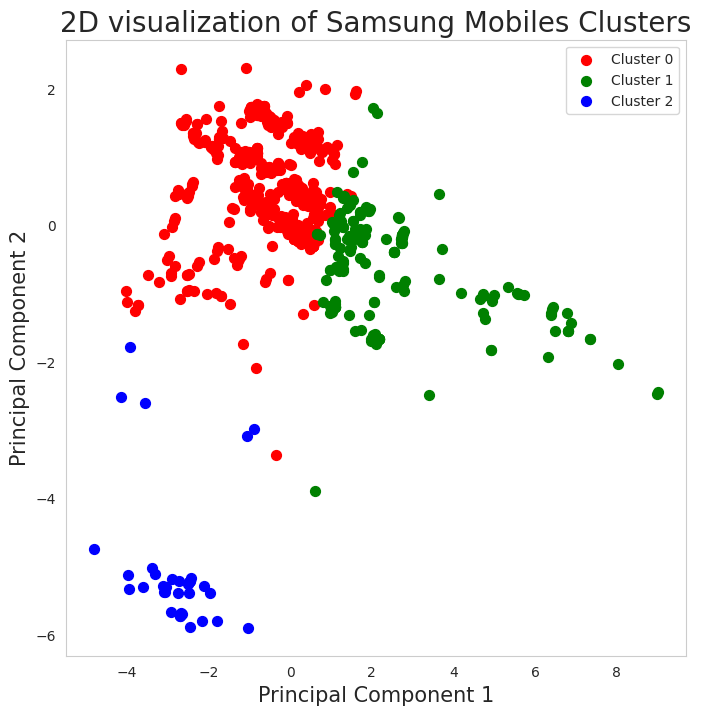

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the two principal components
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
final_df = pd.concat([principal_df, combined_data[['cluster']]], axis=1)

# Plot the clusters
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D visualization of Samsung Mobiles Clusters', fontsize=20)

colors = ['r', 'g', 'b']
for cluster in range(3):
    indicesToKeep = final_df['cluster'] == cluster
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c=colors[cluster], s=50)

ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
ax.grid()

In [ ]:
cluster_characteristics = combined_data.groupby('cluster')[features].mean()
print(cluster_characteristics)

                price   ratings       ram  internal_storage  primary_camera  \
cluster                                                                       
0        17401.428941  4.195955  5.156658        109.521574       44.002756   
1        62646.670588  4.210550  8.833011        202.283273       65.329673   
2         3648.487179  4.179151  5.496723        109.533305       42.408405   

         secondary_camera  display_size  battery_capacity  
cluster                                                    
0               13.946504     15.969587       4779.363027  
1               21.515824     16.681020       4564.497906  
2               12.889732      5.467332        934.589744  


* **Cluster 0 (High-End Segment)**: Klaster ini dapat dicirikan oleh hp dengan harga tinggi (harga rata-rata sekitar 60704) dan spesifikasi tinggi. hp dalam klaster ini memiliki ukuran RAM rata-rata yang lebih besar (8,68), penyimpanan internal yang lebih besar (198,4), dan kamera yang lebih kuat (kamera utama 64,3 MP dan kamera sekunder 21,42 MP). Kemungkinan besar ini adalah hp kelas atas.

* **Cluster 1 (Mid-Range Segment)**: Klaster ini dapat dicirikan oleh hp dengan harga sedang (harga rata-rata sekitar 17267) dan spesifikasi sedang. hp dalam klaster ini memiliki ukuran RAM rata-rata sedang (5,15), penyimpanan internal sedang (110,58), dan kamera berkinerja sedang (kamera utama 45,29 MP dan kamera sekunder 11,62 MP). Kemungkinan besar ini adalah hp kelas menengah.

* **Cluster 2 (Budget Segment)**: Klaster ini dapat dicirikan oleh hp dengan harga murah (harga rata-rata sekitar 3281) dan spesifikasi yang lebih rendah. hp dalam klaster ini memiliki ukuran RAM rata-rata yang lebih rendah (5,63), penyimpanan internal yang lebih rendah (110,84), dan kamera berkinerja lebih rendah (kamera utama 43,39 MP dan kamera sekunder 11,05 MP). Kemungkinan besar hp ini adalah hp yang ramah anggaran.

# Price Prediction Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Select relevant columns for model training
selected_columns = ['ratings', 'ram', 'primary_camera', 'internal_storage', 'battery_capacity', 'cluster', 'price']
data_selected = combined_data[selected_columns]

# Drop rows with missing target values (price) if any
data_selected = data_selected.dropna(subset=['price'])

# Separate features (X) and target (y)
X = data_selected.drop(columns=['price'])
y = data_selected['price']

# Handle missing values by filling them with the mean of each column
X_filled = X.fillna(X.mean())

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X_filled)

# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize all the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(n_estimators=100, random_state=0),
    SVR(),
    GradientBoostingRegressor(random_state=0)
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(y_test, predictions)

    print(f"{model_name} MAE: ", mae)

LinearRegression MAE:  12345.83583324629
DecisionTreeRegressor MAE:  6098.862974262373
RandomForestRegressor MAE:  5415.866477863813
SVR MAE:  14065.154138712749
GradientBoostingRegressor MAE:  5344.157643405373


In [ ]:
important_features_data = combined_data[['ratings', 'ram', 'primary_camera', 'internal_storage', 'battery_capacity', 'cluster', 'price']]

# Step 2: Prepare the data for modeling
X = important_features_data[['ratings', 'ram', 'primary_camera', 'internal_storage', 'battery_capacity', 'cluster']]
y = important_features_data['price']

# Step 3: Train the GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have already split the data into training and testing sets, and X_train, y_train are the training data.
# You can also use the entire dataset for training if you prefer.
model = GradientBoostingRegressor()
model.fit(X, y)

# Step 4: Get the feature importances
feature_importances = model.feature_importances_

# Step 5: Sort and display the important features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
3  internal_storage    0.423845
1               ram    0.202360
2    primary_camera    0.148350
5           cluster    0.109575
4  battery_capacity    0.099935
0           ratings    0.015934


# Getting Prediction

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Function to make a price prediction based on user input
def predict_price(ratings, ram, primary_camera, internal_storage, battery_capacity, cluster):
    # Create a DataFrame with the user input
    input_data = pd.DataFrame({
        'ratings': [ratings],
        'ram': [ram],
        'primary_camera': [primary_camera],
        'internal_storage': [internal_storage],
        'battery_capacity': [battery_capacity],
        'cluster': [cluster]
    })

    # Handle missing values in the input
    input_data_filled = input_data.fillna(input_data.mean())

    # Make the price prediction using the trained GradientBoostingRegressor
    price_prediction = models[-1].predict(input_data_filled)[0]

    return price_prediction

# Create input widgets for user input
ratings_input = widgets.FloatSlider(description='Ratings:', min=1.0, max=5.0, step=0.1, value=3.0)
ram_input = widgets.FloatSlider(description='RAM (GB):', min=0.0, max=16.0, step=0.5, value=4.0)
cam_input = widgets.FloatSlider(description='Camera (MP):', min=0.0, max=108.0, step=0.5, value=4.0)
storage_input = widgets.FloatSlider(description='Storage (GB):', min=0.0, max=128.0, step=0.5, value=4.0)
battery_capacity_input = widgets.FloatSlider(description='Battery Capacity (mAh):', min=0.0, max=10000.0, step=10.0, value=5000.0)
cluster_options = [0, 1, 2]
cluster_input = widgets.Dropdown(description='Cluster:', options=cluster_options, value=0)

# Create a button for prediction
predict_button = widgets.Button(description='Predict Price')

# Output widget to display the prediction result
output = widgets.Output()

# Function to handle the button click and display the prediction
def on_predict_button_click(button):
    # Clear previous output
    output.clear_output()

    # Get user input
    ratings = ratings_input.value
    primary_camera = cam_input.value
    internal_storage = storage_input.value
    ram = ram_input.value
    battery_capacity = battery_capacity_input.value
    cluster = cluster_input.value

    # Make the price prediction
    price_prediction = predict_price(ratings, primary_camera, internal_storage, ram, battery_capacity, cluster)*185

    # Display the prediction
    with output:
        print(f"Predicted Price: Rp{price_prediction:.2f}")

# Attach the click event to the button
predict_button.on_click(on_predict_button_click)

# Display the widgets
display(ratings_input, cam_input, storage_input, ram_input, battery_capacity_input, cluster_input, predict_button, output)


FloatSlider(value=3.0, description='Ratings:', max=5.0, min=1.0)

FloatSlider(value=4.0, description='Camera (MP):', max=108.0, step=0.5)

FloatSlider(value=4.0, description='Storage (GB):', max=128.0, step=0.5)

FloatSlider(value=4.0, description='RAM (GB):', max=16.0, step=0.5)

FloatSlider(value=5000.0, description='Battery Capacity (mAh):', max=10000.0, step=10.0)

Dropdown(description='Cluster:', options=(0, 1, 2), value=0)

Button(description='Predict Price', style=ButtonStyle())

Output()

# Sekiannn

